## Upload the dataframe

In [7]:
import pandas as pd
df = pd.read_csv("diabetes_data_upload.csv")

## Import Packages

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

## Project Introduction

The prevalence of diabetes has risen significantly over the past few decades with an estimated 537 million adults living with the disease in 2021. This condition is categorized by high blood sugar levels due to insulin resistance, inadequate insulin production, or both.

If diabetes is left undiagnosed or unmanaged, the disease can manifest in several complications including cardiovascular disease, kidney failure, vision impairment, and increased risk of infection.

With early diabetes detection and management, these complications can be prevented or delayed. Because diabetes can go undiagnosed until complications occur, there is a need for solid prediction models that can identify individuals at high risk of developing diabetes.

This project aims to develop a machine learning based prediction model for early stage diabetes detection using real patient data.


## Data Overview

Here we view all the features of the dataframe, check the data types of feature, check for any missing or null values, and then check for the total number of rows and columns.

In [9]:
print(df.head())  # View first few rows
print(df.info())  # Check data types and check for missing values
print(df.describe())  # Summary statistics
print(df.shape) # number of records and columns


   Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No             Yes     Yes          Yes             Yes   

  partial paresis muscle stiffness Alopecia Obesity     class  
0              No              Yes      

#Goal
 In this scenario, the target variable is whether the patient is screened positive or negative for diabetes. Now, we need to find the variables or features most importantly used for prediction.


# Data Encoding

For this model we will use binary encoding. Binary encoding is used for categorical features with only two possible values (e.g., Yes/No, Male/Female) to convert them into numerical representations (0 and 1). This transformation is essential for machine learning models, as most algorithms work with numerical inputs rather than text.

In [10]:
df['Gender'].replace({'Male': 1, 'Female': 0}, inplace=True)
df['class'].replace({'Positive': 1, 'Negative': 0}, inplace=True)

columns_with_yes_or_no = ['Polyuria','Polydipsia','sudden weight loss','weakness','Polyphagia','Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing','partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity']
df[columns_with_yes_or_no] = df[columns_with_yes_or_no].replace({'Yes': 1, 'No': 0})

<ipython-input-10-66c99e81d297>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace({'Male': 1, 'Female': 0}, inplace=True)
<ipython-input-10-66c99e81d297>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'].replace({'Male': 1, 'Female': 0}, inplace=True)
<ipython-input-1

## Verify the changes

In [22]:
print(df.head())  # View first few rows
print(df.info())  # Check data types and missing values

   Age  Gender  Polyuria  Polydipsia  sudden weight loss  weakness  \
0   40       1         0           1                   0         1   
1   58       1         0           0                   0         1   
2   41       1         1           0                   0         1   
3   45       1         0           0                   1         1   
4   60       1         1           1                   1         1   

   Polyphagia  Genital thrush  visual blurring  Itching  Irritability  \
0           0               0                0        1             0   
1           0               0                1        0             0   
2           1               0                0        1             0   
3           1               1                0        1             0   
4           1               0                1        1             1   

   delayed healing  partial paresis  muscle stiffness  Alopecia  Obesity  \
0                1                0                 1         1 

## Selecting the Best Features for the Model

In [12]:
X = df.iloc[:,1:16] # all features
Y = df.iloc[:,-1] # target output -> postive or negative correlations

# select the top 10 features
best_features = SelectKBest(score_func=chi2, k=10) # using KBest function to find the best features
fit = best_features.fit(X,Y)

df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

#combine all the features and thier corresponding scores in one data frame
feature_scores = pd.concat([df_columns, df_scores], axis=1)
feature_scores.columns = ['Features', 'Score']
print(feature_scores.nlargest(10, 'Score'))

              Features       Score
2           Polydipsia  120.785515
1             Polyuria  116.184593
3   sudden weight loss   57.749309
11     partial paresis   55.314286
0               Gender   38.747637
9         Irritability   35.334127
5           Polyphagia   33.198418
13            Alopecia   24.402793
7      visual blurring   18.124571
4             weakness   12.724262


## Logistic Regression Model with 6 Best Features


In [14]:
select_features = ['Polydipsia', 'Polyuria', 'sudden weight loss', 'partial paresis', 'Irritability', 'Polyphagia']
X = df[select_features]
Y = df['class']

# split the dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

logregression = LogisticRegression()
logregression.fit(X_train, Y_train)

Y_pred =logregression.predict(X_test)
print(X_test) # test dataset
print(Y_pred ) # predicted values

     Polydipsia  Polyuria  sudden weight loss  partial paresis  Irritability  \
275           0         1                   0                1             0   
93            1         1                   0                1             0   
6             1         1                   0                1             0   
167           1         1                   1                0             1   
90            0         0                   0                1             0   
..          ...       ...                 ...              ...           ...   
69            1         1                   1                1             0   
357           0         0                   0                0             0   
423           1         1                   0                1             0   
334           0         0                   0                0             0   
227           0         0                   1                0             0   

     Polyphagia  
275           1  
93 

# Logistic Regression Performance


In [25]:
from sklearn import metrics
from sklearn.metrics import classification_report
print('Accuracy: ',metrics.accuracy_score(Y_test, Y_pred))
print('Recall: ',metrics.recall_score(Y_test, Y_pred, zero_division=1))
print('Precision: ',metrics.precision_score(Y_test, Y_pred, zero_division=1))
print('F1-score: ', metrics.f1_score(Y_test, Y_pred, zero_division=1))
print('CL Report: ',metrics.classification_report(Y_test, Y_pred, zero_division=1))

Accuracy:  0.8557692307692307
Recall:  0.8591549295774648
Precision:  0.9242424242424242
F1-score:  0.8905109489051095
CL Report:                precision    recall  f1-score   support

           0       0.74      0.85      0.79        33
           1       0.92      0.86      0.89        71

    accuracy                           0.86       104
   macro avg       0.83      0.85      0.84       104
weighted avg       0.86      0.86      0.86       104




The logistic regression model that we trained using the 6 best selected features resulted in an average

1.   accuracy of 85 percent
  * accuracy = the ratio of correctly predicted instances to the total number of instances.
2.   recall of 86 percent
  * recall = the proportion of actual positive cases that were correctly predicted. a high recall is beneficial when false negatives are costly.
3.   precision of 92 percent
  * precision = the proportion of correctly predicted cases out of all predicted positive cases. High precision means fewer false positives. Beneficial when false positives are costly.
4. F1-score of 89
  * a F1-score of 89 means that the model is balancing precision and recall well.



# ROC Curve

In this project, we evaluate the performance of the logistic regression model using a ROC (Receiver Operating Characteristic) curve. The ROC curve helps us visualize the trade-off between the True Positive Rate (Sensitivity) and the False Positive Rate, while the AUC (Area Under the Curve) quantifies the overall effectiveness of the classifier.

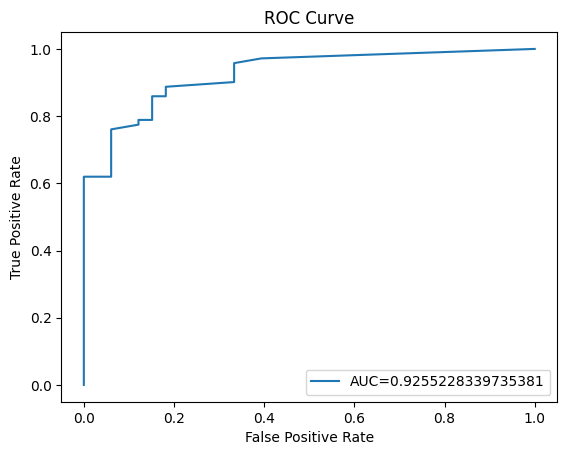

In [16]:
y_pred_proba= logregression.predict_proba(X_test) [::,1]
false_positive_rate, true_positive_rate, _ = metrics.roc_curve(Y_test, y_pred_proba)
auc= metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(false_positive_rate, true_positive_rate,label="AUC="+str(auc))
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)

# Discussion
The model achieved an AUC of 0.92 meaning it (performs well, moderately, or poorly). A model with AUC = 1.0 is a perfect classifier, while AUC = 0.5 is no better than random guessing. The ROC curve suggests that the model is robust.

Now lets see with other models how the performance varies.

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, roc_auc_score

Logistic Regression
Accuracy:  0.8461538461538461
Precision:  0.9104477611940298
Recall:  0.8591549295774648
Support Vector
Accuracy:  0.8942307692307693
Precision:  0.96875
Recall:  0.8732394366197183
Decision Tree
Accuracy:  0.8653846153846154
Precision:  1.0
Recall:  0.8028169014084507
Random Forest
Accuracy:  0.8942307692307693
Precision:  0.96875
Recall:  0.8732394366197183
AdaBoost
Accuracy:  0.8557692307692307
Precision:  0.9117647058823529
Recall:  0.8732394366197183
Bagging
Accuracy:  0.8942307692307693
Precision:  0.96875
Recall:  0.8732394366197183
Gradien Boosting
Accuracy:  0.8653846153846154
Precision:  0.9384615384615385
Recall:  0.8591549295774648


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP
Accuracy:  0.8557692307692307
Precision:  0.9117647058823529
Recall:  0.8732394366197183


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


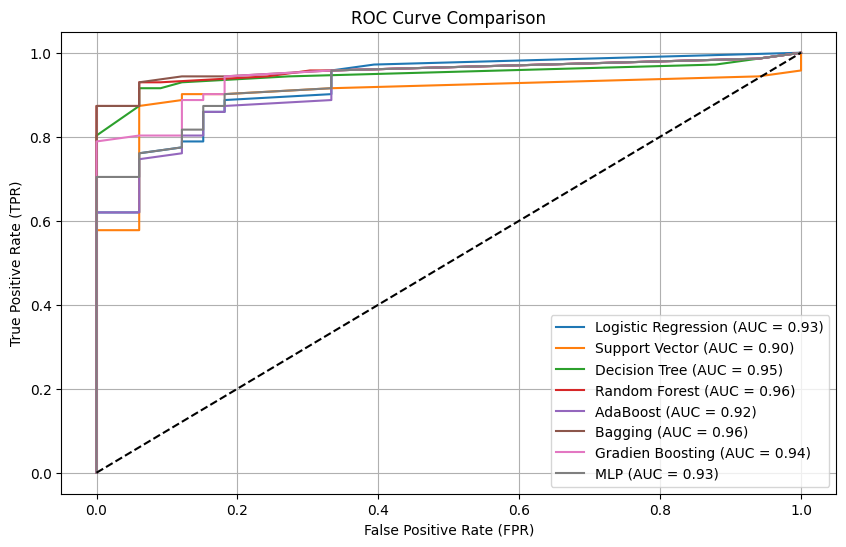

In [32]:
models = {
    "Logistic Regression":LogisticRegression(),
    "Support Vector":SVC(probability=True),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "AdaBoost":AdaBoostClassifier(),
    "Bagging":BaggingClassifier(),
    "Gradien Boosting":GradientBoostingClassifier(),
    "MLP":MLPClassifier()
}

for name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    print(name)
    print('Accuracy: ',metrics.accuracy_score(Y_test, Y_pred))
    print('Precision: ',metrics.precision_score(Y_test, Y_pred, zero_division=1))
    print('Recall: ',metrics.recall_score(Y_test, Y_pred, zero_division=1))

plt.figure(figsize=(10, 6))
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(Y_test, y_probs)
    auc = roc_auc_score(Y_test, y_probs)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random performance)
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()

# Results

Based off of these results, SVM and bagging had the best balanced performance based on accuracy, precision, and recall.

However, since for this specific classifier false negatives are more costly (e.g. missing a diagnosis), I would pick Bagging which has a higher recall and higher AUC value.

#Bagging

Bagging is an ensemble learning method that improves the model performance by combining multiple base learners that are typically decision trees trained on different subsets of the data.

Bagging begins with bootstrap sampling - where multiple subsets of the training data are randomely selected. Then, a separate base model is trained on each subset independantly. The final prediction is made by averaging across all models.

Bagging increases the stability of the model and helps prevent overfitting significantly.



# Conclusion

This project developed a **machine learning model** for **early-stage diabetes detection** using patient data. Given the risks of undiagnosed diabetes, an accurate predictive model is crucial for early intervention.  

We evaluated multiple classifiers, including **Logistic Regression, SVM, Decision Tree, Random Forest, AdaBoost, Bagging, Gradient Boosting, and MLP**, based on **accuracy, precision, recall, F1-score, and AUC**. **SVM and Bagging performed best**, but **Bagging was chosen** due to its **higher recall and AUC**, making it the safer choice for medical diagnosis.  

Bagging's **reduced overfitting and high recall** ensure reliable detection of high-risk individuals, making it well-suited for **preliminary diabetes screening** in clinical settings.